This simple classification project is to use and test Principal Component Analysis.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [46]:
df.drop(columns=['PlayerID'], inplace=True)
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [48]:
df.isna().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [50]:
numeric_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
ordinal_features = ['GameDifficulty']
nominal_features = [feat for feat in df.columns if feat not in numeric_features and
                    feat not in ordinal_features and feat != 'EngagementLevel']

target = 'EngagementLevel'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1310, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first'), nominal_features),
                  ('ordinal', OrdinalEncoder(), ordinal_features),
                  ('scaler', StandardScaler(), numeric_features)],
)

pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(
            n_estimators=100,
            n_jobs=-1,
            max_depth=10,
            random_state=1310))
    ]
)

pipe_pca = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=7)),
        ('rf', RandomForestClassifier(
            n_estimators=100,
            n_jobs=-1,
            max_depth=10,
            random_state=1310))
    ]
)



In [51]:
pipe.fit(X_train, y_train)
pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Location',
                                                   'GameGenre',
                                                   'InGamePurchases']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['GameDifficulty']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'PlayTimeHours',
                                                   'SessionsPerWeek',
                                                   'AvgSessionDurationMinutes',
                                                   'PlayerLevel',
                                                   'AchievementsUnlocked'])])),
                ('pca', PCA(n_components=7)),
                ('rf',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=1310))])

In [52]:
pca_step = pipe_pca.named_steps['pca']
explained_variance_ratio = pca_step.explained_variance_ratio_

print(f"Explained variance ratio: {explained_variance_ratio}")

Explained variance ratio: [0.12150593 0.12067556 0.12023041 0.11958865 0.11886043 0.11880724
 0.09100146]


In [53]:
y_pred = pipe.predict(X_test)
y_pred_pca = pipe_pca.predict(X_test)

print(f'Model without PCA preprocess:\n {classification_report(y_test, y_pred)}\n')

print(f'Model with PCA preprocess:\n {classification_report(y_test, y_pred_pca)}')

Model without PCA preprocess:
               precision    recall  f1-score   support

        High       0.91      0.82      0.86      2067
         Low       0.92      0.84      0.88      2065
      Medium       0.86      0.95      0.90      3875

    accuracy                           0.89      8007
   macro avg       0.90      0.87      0.88      8007
weighted avg       0.89      0.89      0.88      8007


Model with PCA preprocess:
               precision    recall  f1-score   support

        High       0.90      0.79      0.84      2067
         Low       0.88      0.73      0.80      2065
      Medium       0.80      0.92      0.86      3875

    accuracy                           0.84      8007
   macro avg       0.86      0.82      0.83      8007
weighted avg       0.85      0.84      0.84      8007



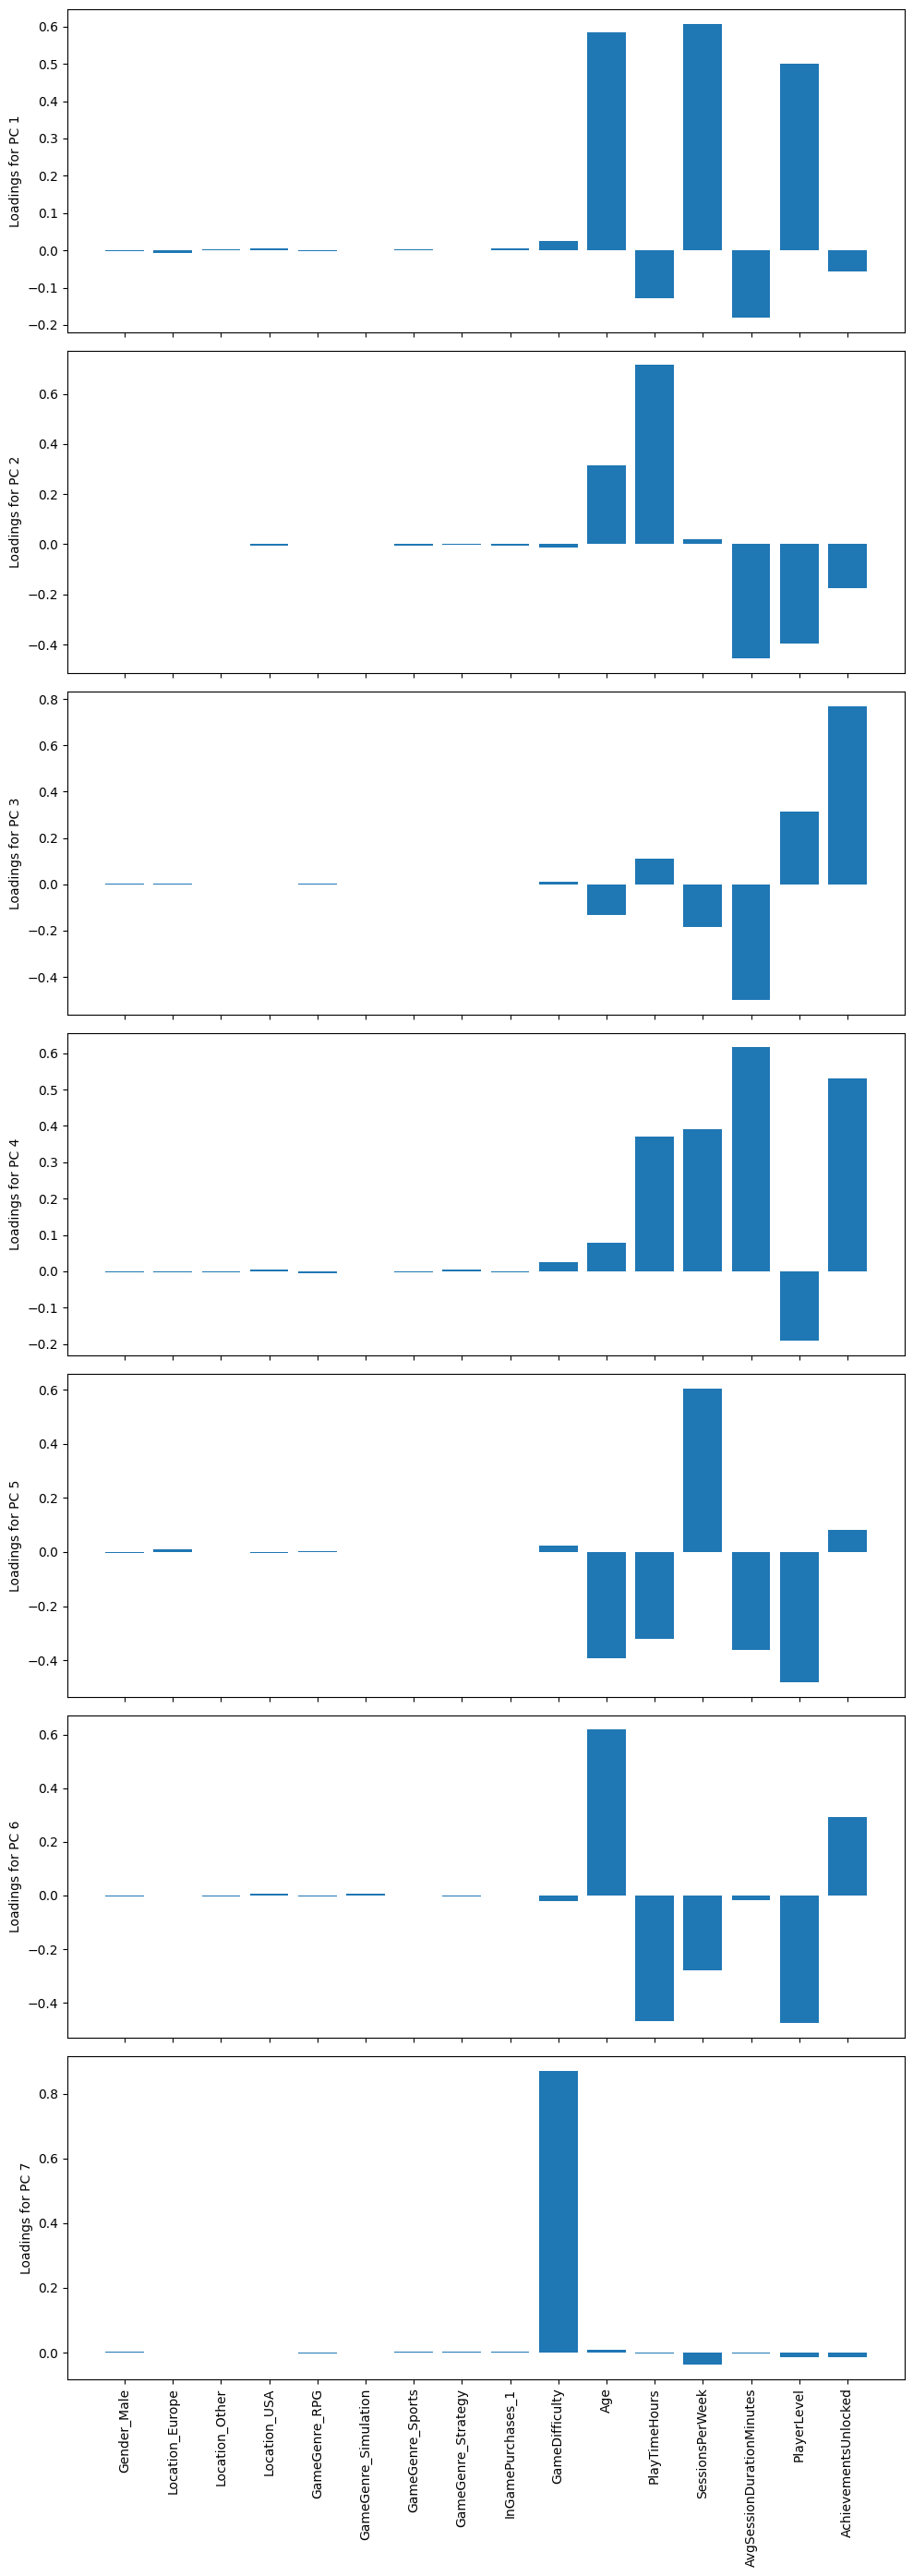

In [76]:
loadings = pca_step.components_.T * np.sqrt(pca_step.explained_variance_)

import matplotlib.pyplot as plt

# Number of principal components to plot
n_components = loadings.shape[1]

# List of feature names after preprocessing
feature_names = ['Gender_Male', 'Location_Europe', 'Location_Other', 'Location_USA', 
                  'GameGenre_RPG', 'GameGenre_Simulation', 'GameGenre_Sports', 'GameGenre_Strategy', 
                  'InGamePurchases_1', 'GameDifficulty', 'Age', 'PlayTimeHours', 
                  'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Create subplots for each principal component
fig, axes = plt.subplots(n_components, 1, figsize=(10, 4 * n_components), sharex=True)

for i in range(n_components):
    loadings_pc = loadings[:, i]
    ax = axes[i]
    bars = ax.bar(feature_names, loadings_pc, align='center')
    ax.set_ylabel(f'Loadings for PC {i + 1}')
    ax.set_xticks(range(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=90)

plt.tight_layout()
plt.show()